In [37]:
import numpy as np
import matplotlib.pyplot as plt
from pymerlin.recon import linear_phyllotaxis, piccini_phyllotaxis
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm
from helpers import *
%matplotlib inline

In [38]:
# Golden ratio
g = (1 + np.sqrt(5))/2

# Golden angle
ag = 2*np.pi/g**2

print("Golden ratio: {:.6f}\nGolden angle: {:.2f} deg".format(g, np.rad2deg(ag)))

Golden ratio: 1.618034
Golden angle: 137.51 deg


## Introduction
This notebooks gives some additional information about the phyllotaxis trajectory to accompany the paper. There is a function in pymerlin for producing the phyllotaxis trajectory. Below we plot the trajectory with different smoothing factors to show how that changes the trajectory. It is plotted as points to better illustrate how the spacing between points changes.

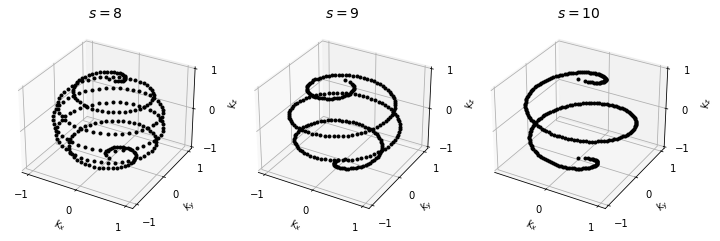

In [43]:
fig = plt.figure(figsize=(12,4))
for (i,sf) in enumerate([8,9,10]):
    traj = linear_phyllotaxis(n=256, nint=1, sf=sf)
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    ax.plot(traj[:,0], traj[:,1], traj[:,2], '.k')
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    ax.set_xlabel(r'$k_x$')
    ax.set_ylabel(r'$k_y$')
    ax.set_zlabel(r'$k_z$')
    ax.set_title(r'$s={}$'.format(sf), fontsize=14)

plt.savefig("phyllotaxis_traj_s_comp.png",dpi=300)
plt.show()

### Subsampling for smaller angular steps
The azimuthal angle is incremented by the golden angle for each spoke. Below we demonstrate how subsampling with a factor $x\in F_n$ (where $F_n$ is the Fibonacci sequence) results in smaller and smaller angular steps.

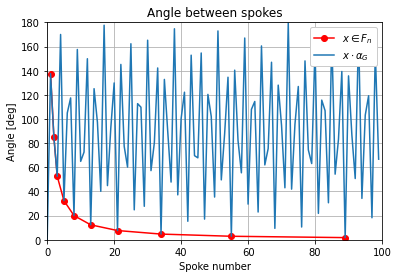

In [49]:
x = np.arange(100)
phi = x*ag
plt.figure()
phi1 = np.mod(phi,2*np.pi)
mask = phi1>np.pi
phi1[mask] = -1*phi1[mask]+2*np.pi
phi1 *= 360/(2*np.pi)

fibnum = np.array([fibonacci(x) for x in range(2,12)])
plt.plot(fibnum, phi1[fibnum], 'o-r', label=r'$x\in F_n$')
plt.plot(x,phi1, label=r'$x\cdot \alpha_G$')
plt.title("Angle between spokes")
plt.xlabel("Spoke number")
plt.ylabel("Angle [deg]")
plt.legend(framealpha=1, loc='upper right')
plt.axis([0,100,0,180])
plt.grid()
plt.show()

### Uniform sampling density
In this work, we wanted to achieve an isotropic field of view, for which the sampling density should be even throughout k-space. The formulation by Piccini et al results in lower sampling density around the poles in k-space, thus an non-isotropic field of view. This is illustrated through the figures below (Note, calculation of the voronoi diagram in 3D takes a while so be patient...)

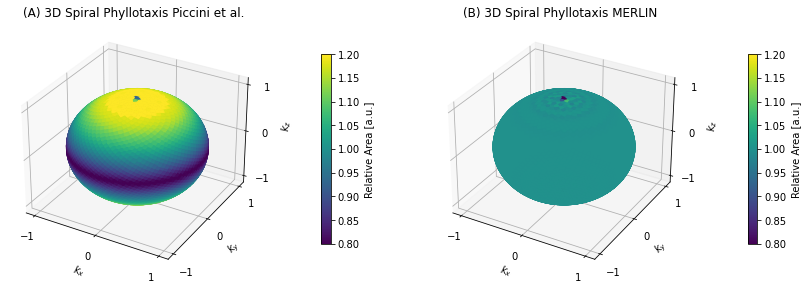

In [52]:
nint = 13
spi = 256
n = nint*spi
vmin=0.8
vmax=1.2
cmap='viridis'

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1, projection='3d')
traj_pic = piccini_phyllotaxis(n,nint=nint)
voronoi_3D(traj=traj_pic, vmin=vmin, vmax=vmax, cmap=cmap, ax=ax, title='(A) 3D Spiral Phyllotaxis Piccini et al.')

ax = fig.add_subplot(1,2,2, projection='3d')
traj_merlin = linear_phyllotaxis(n, nint, 7)
voronoi_3D(traj=traj_merlin, vmin=vmin, vmax=vmax, cmap=cmap, ax=ax, title='(B) 3D Spiral Phyllotaxis MERLIN')

plt.tight_layout()
plt.savefig('phyllotaxis_sampling_density.png', dpi=300)
plt.show()

## 2D golden means
The 2D golden means was presented by [Chan et al. MRM 2009](http://www.doi.org/10.1002/mrm.21837). It has been used successfully for self-navigated UTE but is not well suited for silent ZTE due to large gradient steps between spokes as demonstrated below.

v1: 0.4655712318767679, v2: 0.6823278038280193


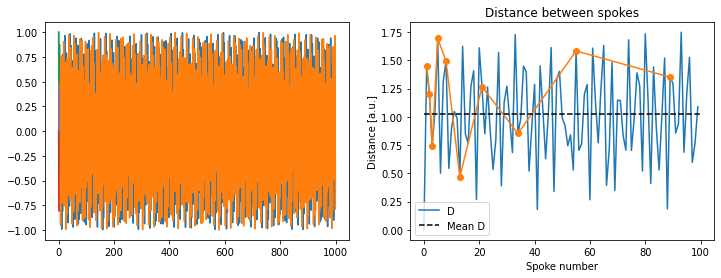

In [23]:
traj = gm_3D_trajectory(1000)
i_spoke_ref = 500
d = traj - traj[i_spoke_ref,:]
dmag = np.sqrt(np.sum(d**2, axis=1))
dmag_plot = dmag[i_spoke_ref:i_spoke_ref+100]

fig = plt.figure(figsize=(12,4))
fig.add_subplot(1,2,1)
plt.plot(traj[:,0])
plt.plot(traj[:,1])
plt.plot(traj[:2])

fig.add_subplot(1,2,2)
plt.plot(dmag_plot, label='D')
plt.plot(fibnum, dmag_plot[fibnum],'-o')
plt.plot([0,100], [np.mean(dmag)]*2, '--k', label=r'Mean D')
plt.title('Distance between spokes')
plt.xlabel('Spoke number')
plt.ylabel('Distance [a.u.]')
plt.legend()
plt.show()

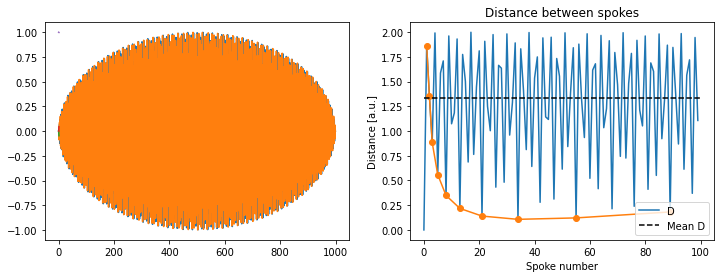

array([1.86406125, 1.35097772, 0.88495126, 0.55908006, 0.34870662,
       0.21750604, 0.14004643, 0.10701076, 0.12147281, 0.18163148])

In [22]:
traj = linear_phyllotaxis(1000, nint=1, sf=1)
i_spoke_ref = 500
d = traj - traj[i_spoke_ref,:]
dmag = np.sqrt(np.sum(d**2, axis=1))
dmag_plot = dmag[i_spoke_ref:i_spoke_ref+100]

fig = plt.figure(figsize=(12,4))
fig.add_subplot(1,2,1)
plt.plot(traj[:,0])
plt.plot(traj[:,1])
plt.plot(traj[:2])

fig.add_subplot(1,2,2)
plt.plot(dmag_plot, label='D')
fibnum = np.array([fibonacci(x) for x in range(2,12)])
plt.plot(fibnum, dmag_plot[fibnum],'-o')
plt.plot([0,100], [np.mean(dmag)]*2, '--k', label=r'Mean D')
plt.title('Distance between spokes')
plt.xlabel('Spoke number')
plt.ylabel('Distance [a.u.]')
plt.legend()
plt.show()

In [20]:
traj.shape

(1000, 3)

## 3D Phyllotaxis

### Angle between spokes

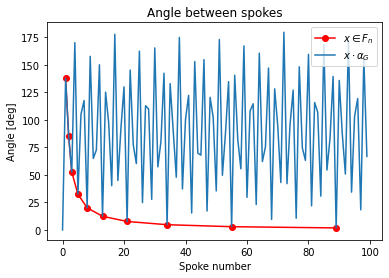

The example in section 2.1: Angle between first and 13th spokes (7th Fibonacci number) is then

In [5]:
k = 8
print(r"dPhi{} = {:.1f} deg".format(k,phi1[fibonacci(k)]))

dPhi8 = 7.7 deg


### Trajectory example

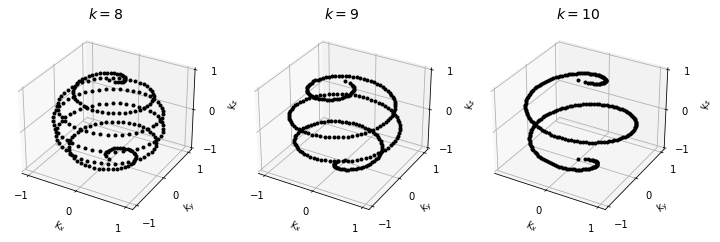

In [35]:
fig = plt.figure(figsize=(12,4))
for (i,sf) in enumerate([8,9,10]):
    traj = linear_phyllotaxis(n=256, nint=1, sf=sf)
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    ax.plot(traj[:,0], traj[:,1], traj[:,2], '.k')
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    ax.set_xlabel(r'$k_x$')
    ax.set_ylabel(r'$k_y$')
    ax.set_zlabel(r'$k_z$')
    ax.set_title(r'$k={}$'.format(sf), fontsize=14)


plt.show()

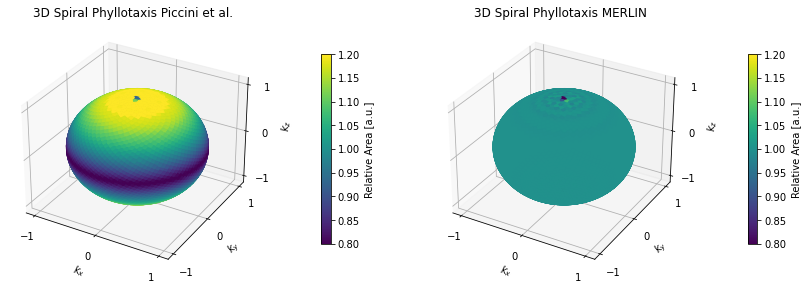

In [7]:
nint = 13
spi = 256
n = nint*spi
vmin=0.8
vmax=1.2
cmap='viridis'

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1, projection='3d')
traj_pic = piccini_phyllotaxis(n,nint=nint)
voronoi_3D(traj=traj_pic, vmin=vmin, vmax=vmax, cmap=cmap, ax=ax, title='3D Spiral Phyllotaxis Piccini et al.')

ax = fig.add_subplot(1,2,2, projection='3d')
traj_merlin = linear_phyllotaxis(n, nint, 7)
voronoi_3D(traj=traj_merlin, vmin=vmin, vmax=vmax, cmap=cmap, ax=ax, title='3D Spiral Phyllotaxis MERLIN')

plt.tight_layout()

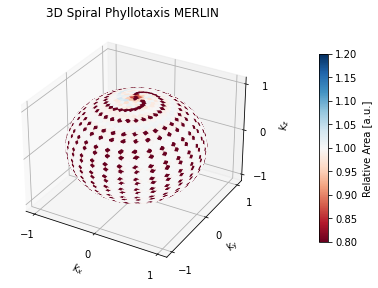

In [44]:
sf = 7
nint = 15
spi = 256
n = nint*spi

traj_merlin = linear_phyllotaxis(n, nint, sf)

cmap='RdBu'
vmin=0.8
vmax=1.2

aref = 4*np.pi/(fibonacci(sf)*spi)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
voronoi_3D(traj=traj_merlin, vmin=vmin, vmax=vmax, aref=aref,
           cmap=cmap, ax=ax, title='3D Spiral Phyllotaxis MERLIN')

plt.tight_layout()

In [39]:
spi = 512
nint = 28
sf = 8
n = nint*spi
nnom = fibonacci(sf)*spi
Aref = 4*np.pi/nnom
traj_merlin = linear_phyllotaxis(n, nint, sf)
sv, areas = voronoi_area(traj_merlin,aref=Aref)

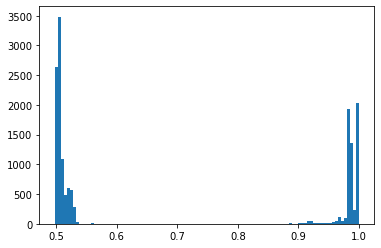

In [29]:
plt.figure()
plt.hist(areas, bins=100)
plt.show()

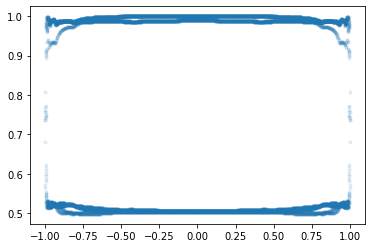

In [40]:
plt.figure()
plt.plot(traj_merlin[:,2], areas, '.', alpha=0.1)